### [1] 패키지 참조

In [44]:
import warnings
warnings.filterwarnings(action='ignore')

from pandas import read_excel, DataFrame
from math import sqrt
from scipy.stats import pearsonr, spearmanr, normaltest, bartlett, levene

import sys
import seaborn as sb
from matplotlib import pyplot as plt

### [2] 그래프 초기화

In [21]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

# 상관분석 연구과제

> 아래 문제의 모든 데이터셋은 정규성과 등분산성을 충족한다고 가정한다.

## 문제 1

다음 자료는 야구팀의 홈런수와 타율에 관한 자료이다. 홈런수와 평균타율이 상관관계가 있는지 그 관련성을 분석하라.

![](res/q01.png)

> https://data.hossam.kr/mldata/baseball.xlsx

### [1] 데이터 가져오기

In [8]:
df1 = read_excel('https://data.hossam.kr/mldata/baseball.xlsx')
df1 # 피어슨 상관분석

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


In [22]:
u1 = df1.columns
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = df1[i]
    equal_var_fields.append(filtered_data)
    s, p = normaltest(filtered_data)

    normalize = p > 0.05
    report.append({"field": i, "statistic": s, "p-value": p, "result": normalize})
    normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
홈런수,0.955184,6.202752e-01,True
평균타율,0.713603,6.999114e-01,True
Bartlett,181.377577,2.424630e-41,False


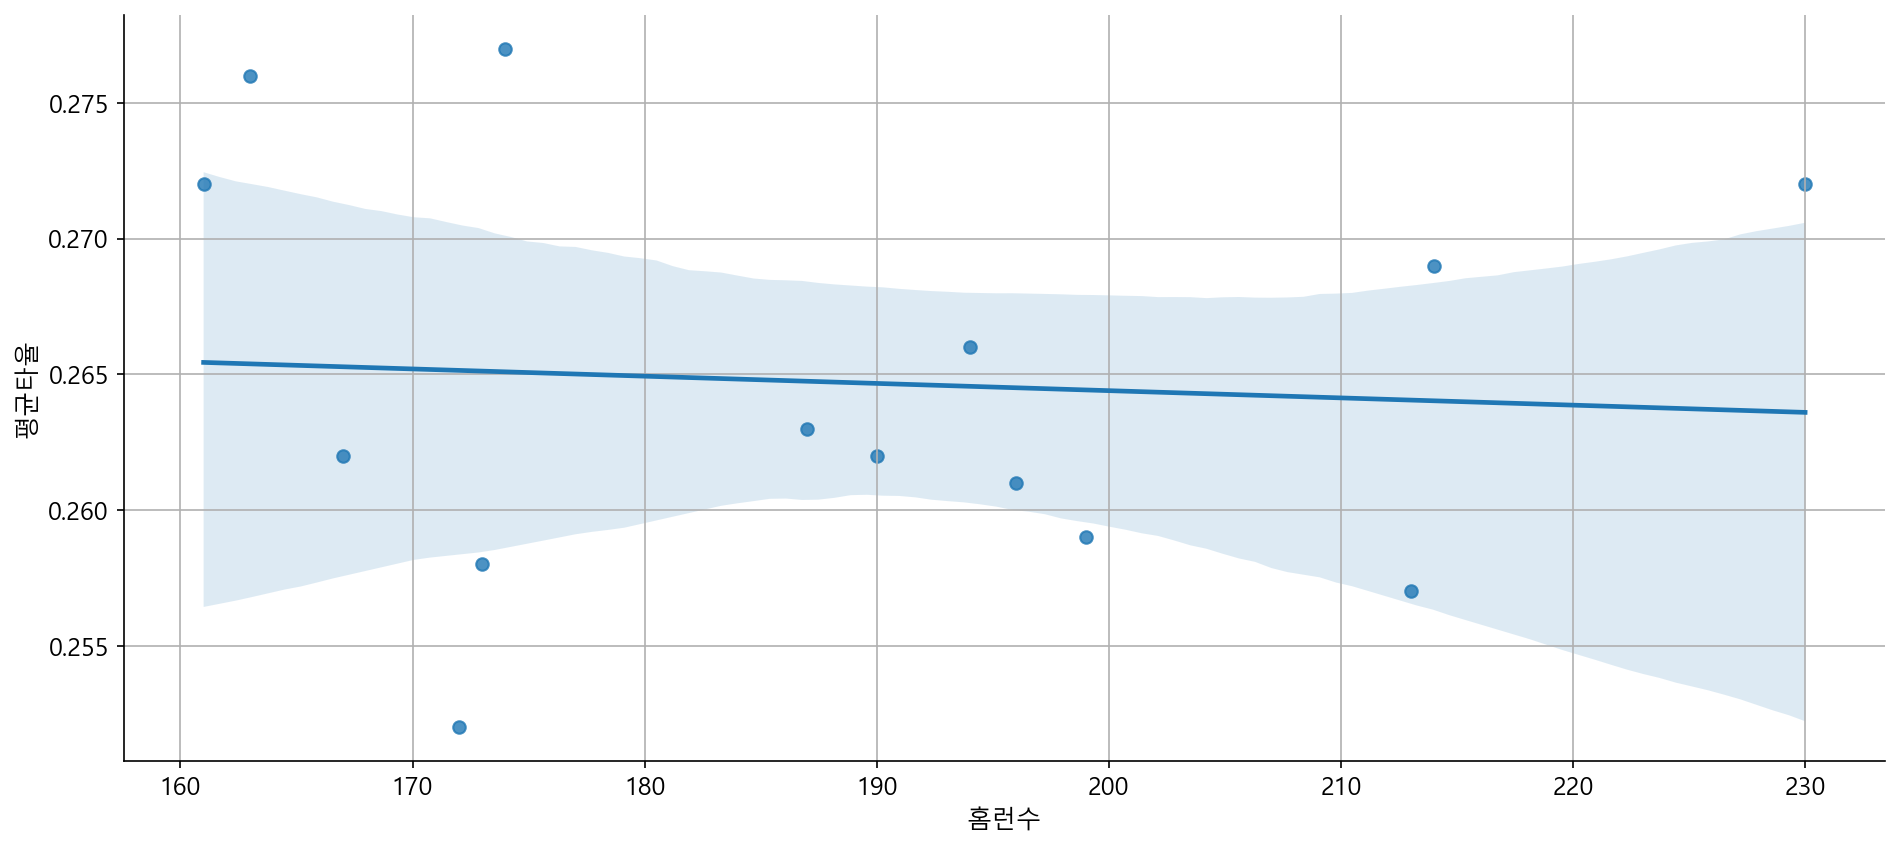

In [25]:
g = sb.lmplot(data=df1, x='홈런수', y='평균타율')
g.fig.set_figwidth(15)
g.fig.set_figheight(6)
g.fig.set_dpi(150)
plt.grid()
plt.show()
plt.close()

In [28]:
s, p = pearsonr(df1['홈런수'],df1['평균타율'])
f"상관계수: {s:.3f}, p-value: {p:.3f}, {'대립' if p <= 0.05 else '귀무'}가설 채택"

'상관계수: -0.075, p-value: 0.800, 귀무가설 채택'

> 홈런수와 평규타율은 상관이 없다.

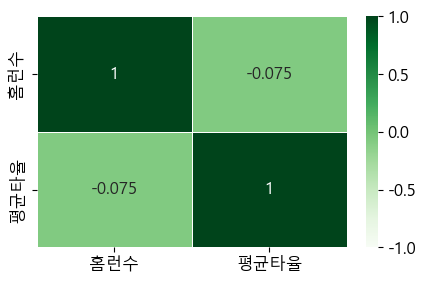

In [27]:
plt.figure(figsize=(5,3))

sb.heatmap(df1.corr(method='pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

## 문제 2

어떤 원료의 품질특성($x$)과 이 원료를 사용하여 만든 제품의 품질특성($y$)에 관한 조사를 한 결과 다음 데이터를 얻었다.

이들 간 상관관계를 구하고 상관 유무 검정을 유의수준 `5%`에서 실시하라.

![](res/q02.png)

> https://data.hossam.kr/mldata/product.xlsx


In [30]:
df2 = read_excel('https://data.hossam.kr/mldata/product.xlsx')
df2

,x,y
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


In [32]:
u1 = df2.columns
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = df2[i]
    equal_var_fields.append(filtered_data)
    s, p = normaltest(filtered_data)

    normalize = p > 0.05
    report.append({"field": i, "statistic": s, "p-value": p, "result": normalize})
    normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
x,1.137204,0.566316,True
y,6.152694,0.046127,False
Levene,0.324873,0.575739,True


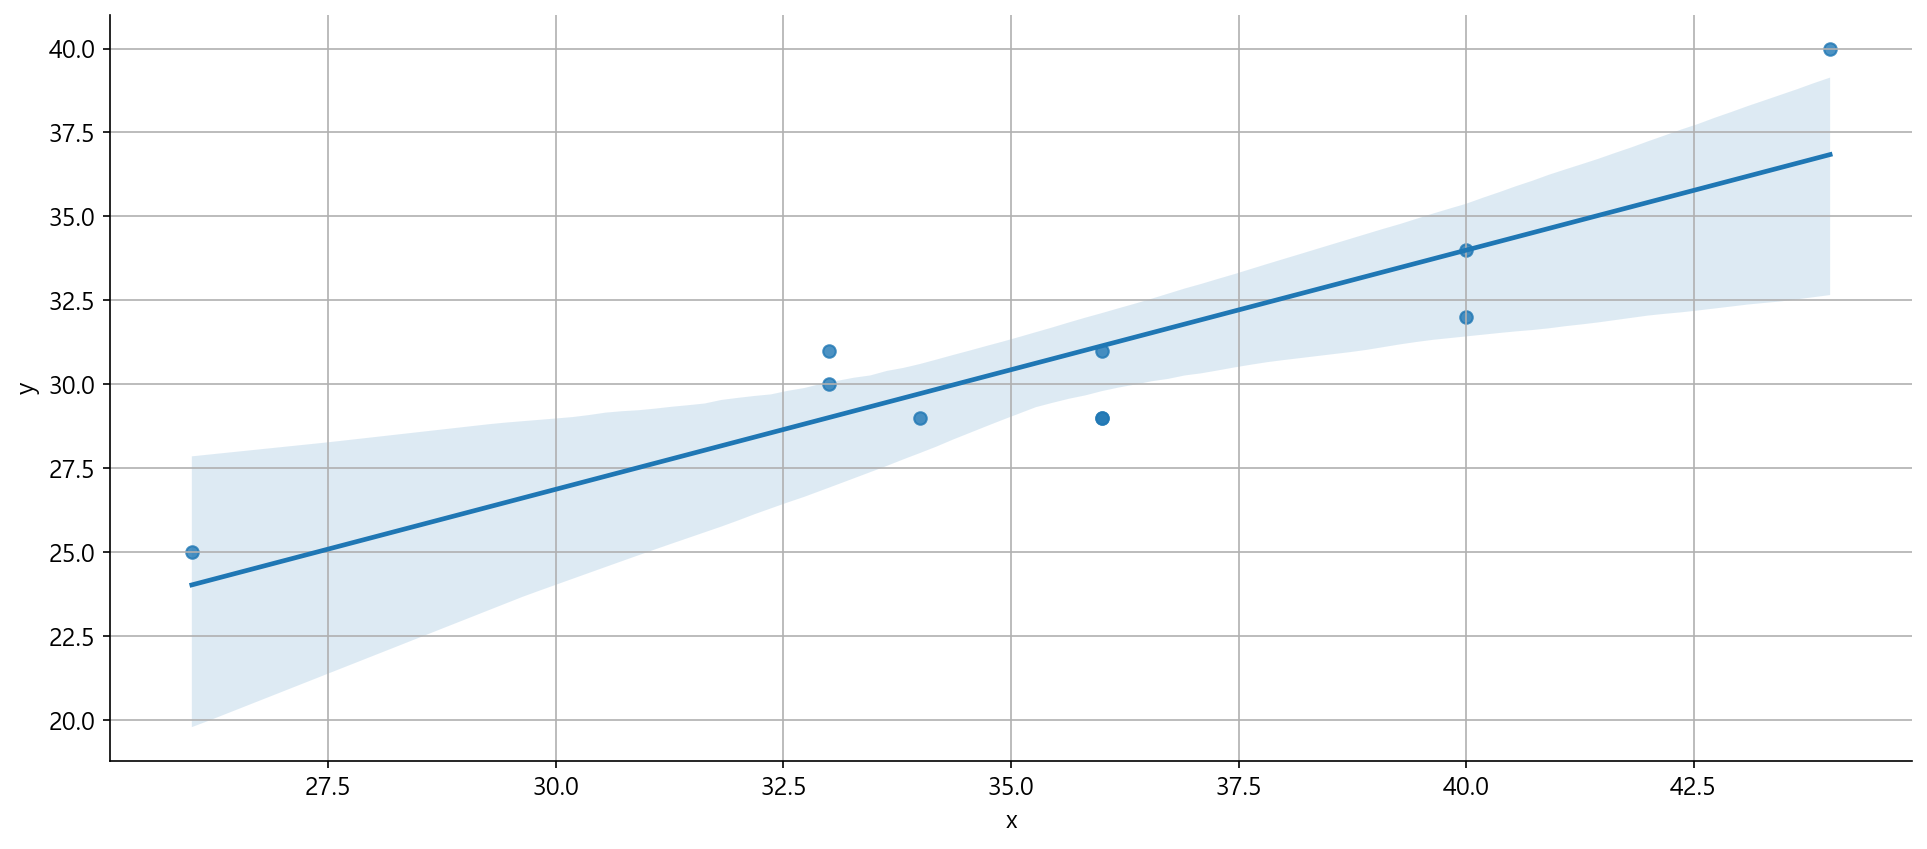

In [33]:
g = sb.lmplot(data=df2, x='x', y='y')
g.fig.set_figwidth(15)
g.fig.set_figheight(6)
g.fig.set_dpi(150)
plt.grid()
plt.show()
plt.close()

In [49]:
s, p = spearmanr(df2['x'],df2['y'])
f"상관계수: {s:.3f}, p-value: {p:.3f}, {'대립' if p <= 0.05 else '귀무'}가설 채택"

'상관계수: 0.737, p-value: 0.015, 대립가설 채택'

> 유의수준 0.05에서 원료의 품질특성($x$)과 제품의 품질특성($y$)는 상관이 있다.

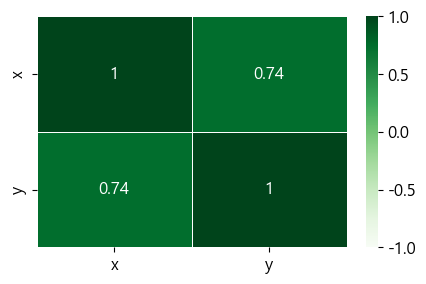

In [50]:
plt.figure(figsize=(5,3))

sb.heatmap(df2.corr(method='spearman'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

## 문제 3

다음은 학생들에 대한 공부 시간과 성적 데이터이다. 분석하라.

![](res/q03.png)

> https://data.hossam.kr/mldata/study_time.xlsx

In [38]:
df3 = read_excel('https://data.hossam.kr/mldata/study_time.xlsx')
df3

,공부시간,성적
0,2,65
1,4,85
2,3,75
3,5,90
4,6,95
5,7,70
6,8,80
7,9,85
8,10,100
9,1,60


In [39]:
u1 = df3.columns
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = df3[i]
    equal_var_fields.append(filtered_data)
    s, p = normaltest(filtered_data)

    normalize = p > 0.05
    report.append({"field": i, "statistic": s, "p-value": p, "result": normalize})
    normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
공부시간,2.026976,0.362951,True
성적,0.515871,0.772645,True
Bartlett,13.936744,0.000189,False


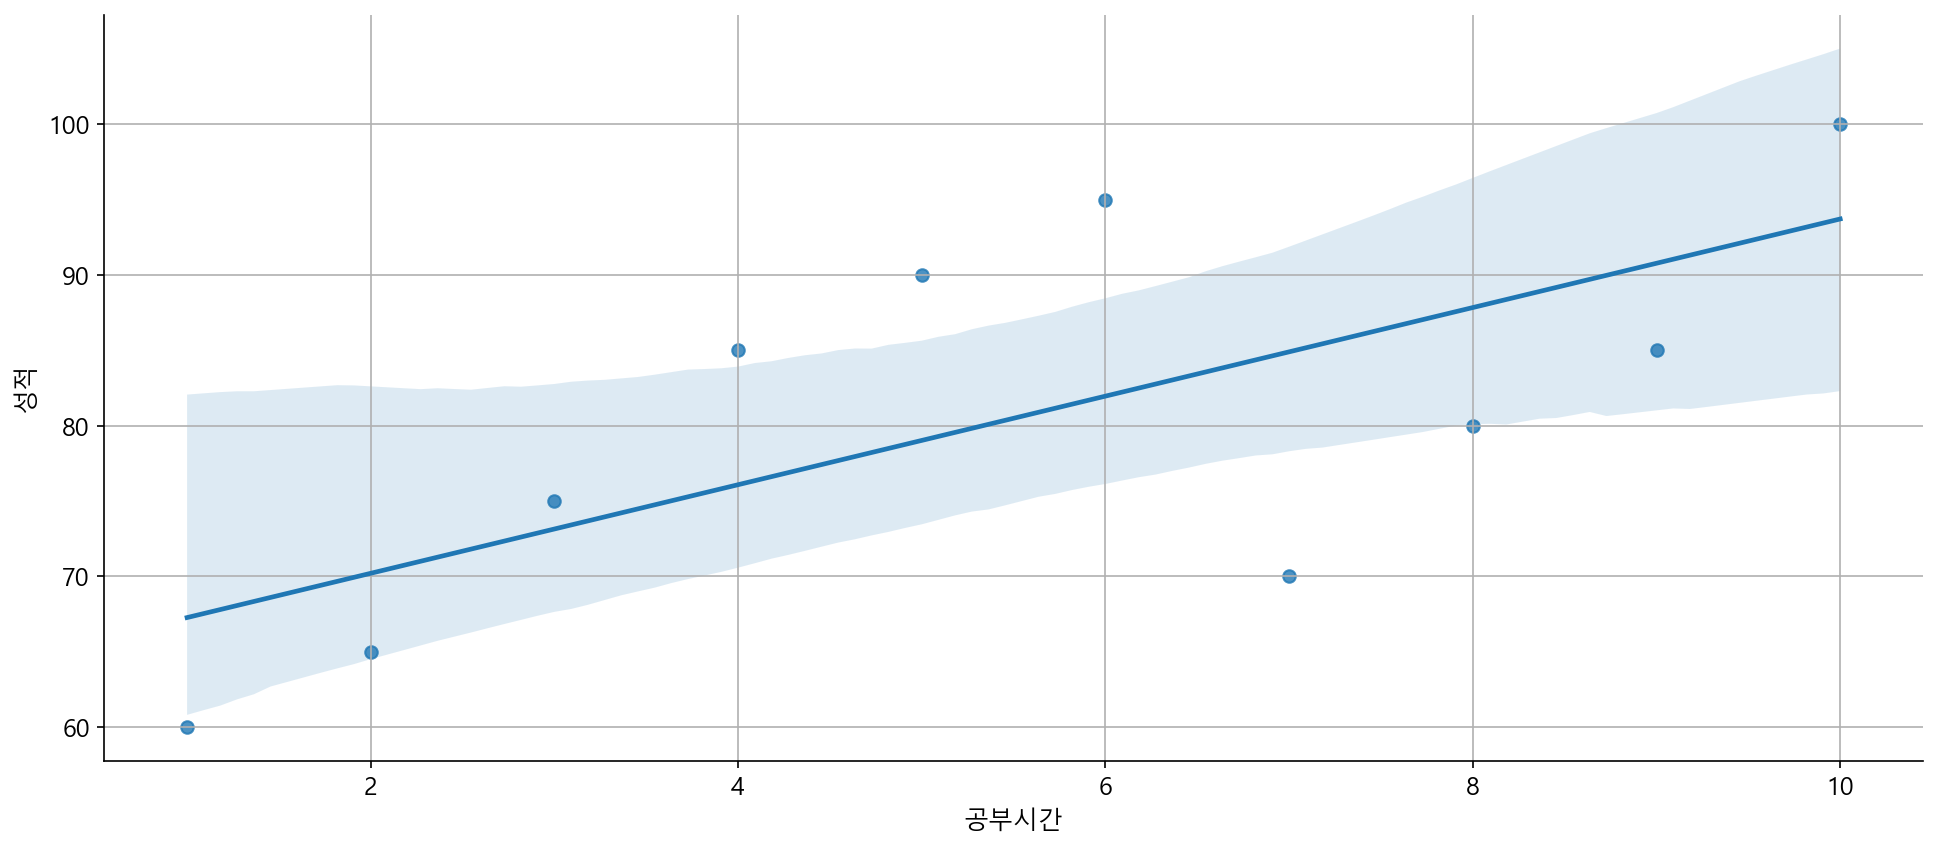

In [40]:
g = sb.lmplot(data=df3, x='공부시간', y='성적')
g.fig.set_figwidth(15)
g.fig.set_figheight(6)
g.fig.set_dpi(150)
plt.grid()
plt.show()
plt.close()

In [43]:
s, p = pearsonr(df3['공부시간'],df3['성적'])
f"상관계수: {s:.3f}, p-value: {p:.3f}, {'대립' if p <= 0.05 else '귀무'}가설 채택"

'상관계수: 0.684, p-value: 0.029, 대립가설 채택'

> 공부시간과 성적은 상관이 있다.

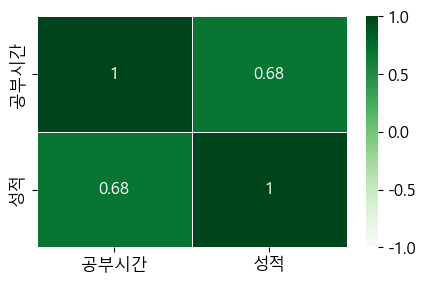

In [42]:
plt.figure(figsize=(5,3))

sb.heatmap(df3.corr(method='pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()